In [1]:
# data
import pandas as pd
import geopandas as gpd
import numpy as np

# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from highlight_text import fig_text, ax_text
from pypalettes import load_cmap
from matplotlib.patches import FancyBboxPatch
from drawarrow import ax_arrow
from pyfonts import load_google_font

import warnings
warnings.filterwarnings("ignore")

In [2]:
uae = gpd.read_file(r"..\data\United_Arab_Emirates_ADM1_simplified.simplified.geojson")
uae_stat = pd.read_csv(r"..\data\uae.csv")

In [3]:
uae_merged = uae.merge(right=uae_stat, left_on="shapeName", right_on="Emirate", how="left")

In [4]:
uae_merged["GDP %"] = uae_merged["GDP (B USD) 2023"]/uae_merged["GDP (B USD) 2023"].sum()
uae_merged["Population"] = uae_merged["Population"].apply(lambda x: float(x.replace(",", "")))
uae_merged["Area (km2)"] = uae_merged["Area (km2)"].apply(lambda x: float(x.replace(",", "")))
uae_merged["Population %"] = uae_merged["Population"]/uae_merged["Population"].sum()
uae_merged["Area (km2) %"] = uae_merged["Area (km2)"]/uae_merged["Area (km2)"].sum()

In [5]:
data = uae_merged.copy()

In [6]:
data.columns = [
    'shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry', 'Emirate', 'GDP (B USD) 2023', 'Area (km2)', 'Population',
       'GDP %', 'Population %', 'Area %'
]

In [7]:
data["GDP %"] = data["GDP %"].apply(lambda x: np.round(x, 4))
data["Population %"] = data["Population %"].apply(lambda x: np.round(x, 4))
data["Area %"] = data["Area %"].apply(lambda x: np.round(x, 4))

In [8]:
# FONT

rb_b = load_google_font("Roboto Condensed", weight=500)
rb = load_google_font("Roboto Condensed")
rb_l = load_google_font("Roboto Condensed", weight=300)

In [11]:
data["GDP share by Area share"] = np.round(data["GDP %"]/data["Area %"],3)

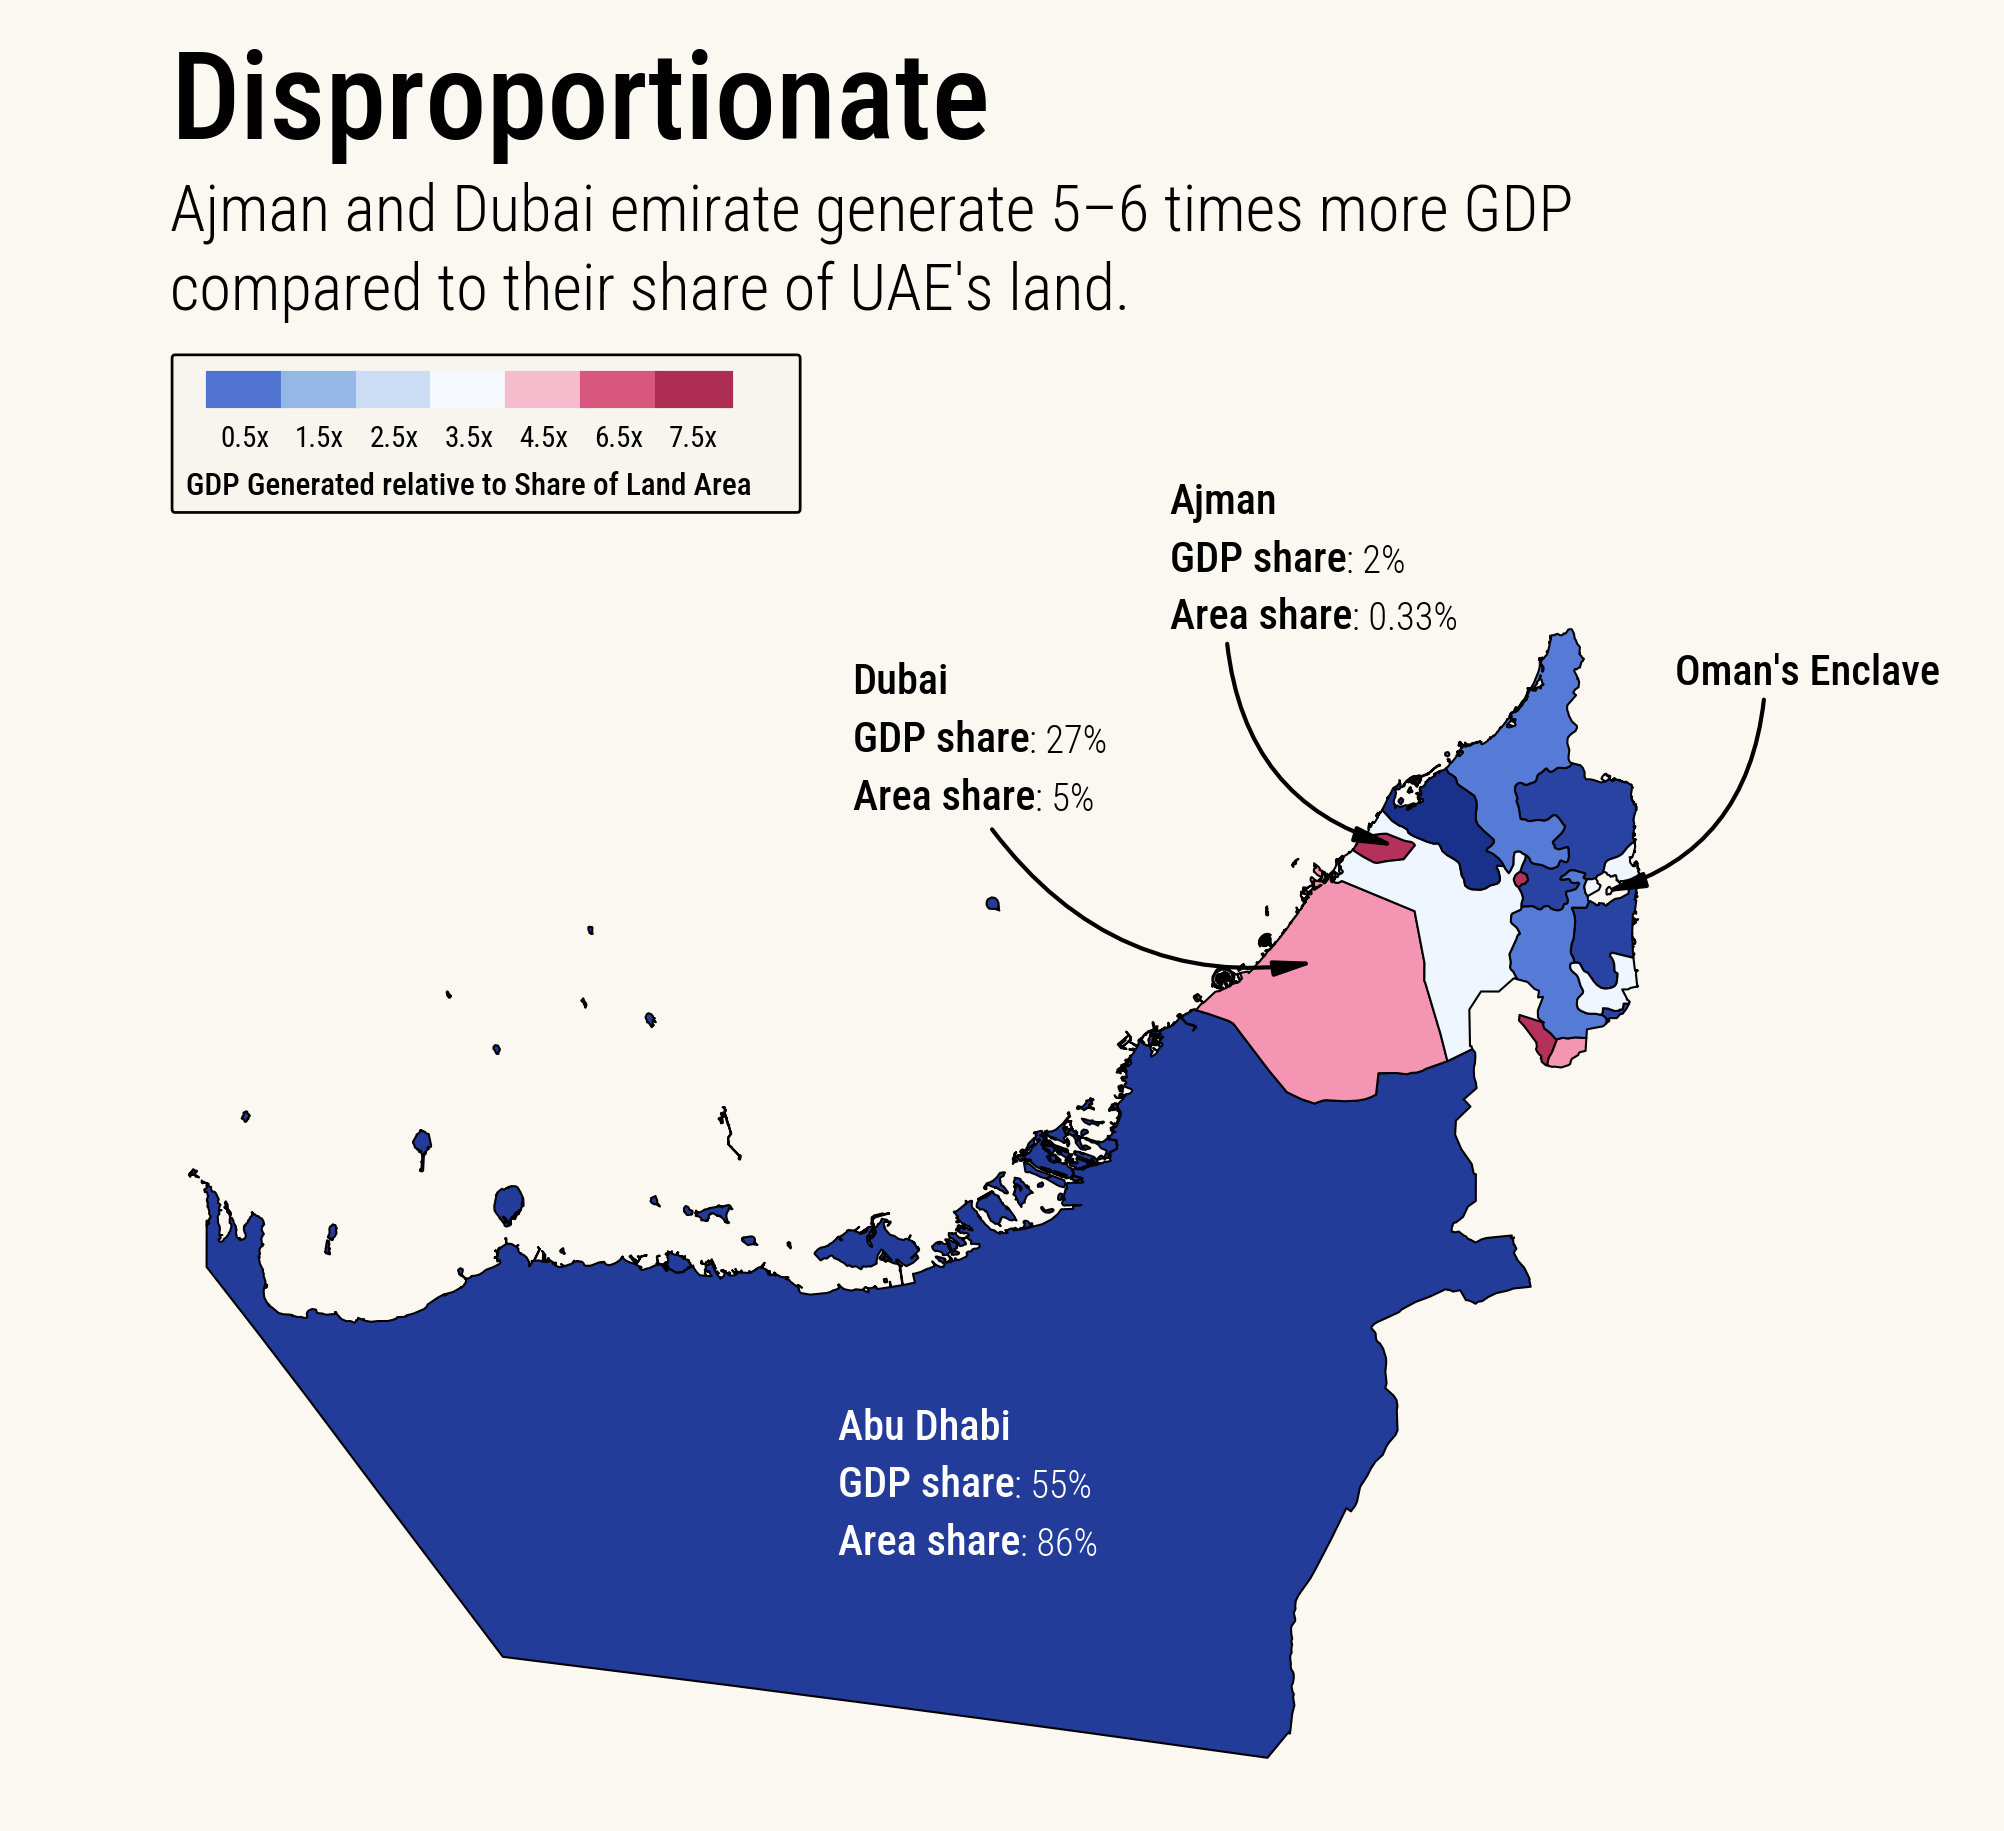

In [12]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

bg = "#FAF8F1"

fig.set_facecolor(bg)
ax.set_facecolor(bg)

fig_text(s="Disproportionate",
         x=0.269, y=1, ha="left", size=29.5, font=rb_b)

fig_text(s="Ajman and Dubai emirate generate 5–6 times more GDP\ncompared to their share of UAE's land.",
         x=0.269, y=0.925, ha="left", font=rb_l, size=15.5)


ax.axis("off")
ax.grid(False)


cmap = load_cmap("Benedictus", reverse=True, cmap_type="continuous")
min_rate, max_rate = 0.5, 7
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

data.plot(
    ax=ax, cmap=cmap, norm=norm,
    column="GDP share by Area share",
    edgecolor="black", linewidth=0.5
)


value_ranges = [0.5, 1.5, 2.5, 3.5, 4.5, 6.5, 7.5, 8.5]
labels = ["0.5x", "1.5x", "2.5x", "3.5x", "4.5x", "6.5x", "7.5x"]

rectangle_width = 0.25
rectangle_height = 0.1
legend_x_start = 51.595
legend_y = 26.75
legend_x_step = 0.25

for i in range(len(labels)):
    value = (
        (value_ranges[i] + value_ranges[i + 1]) / 2 / value_ranges[-1]
    )  # Normalize the value to [0, 1]
    color = cmap(value)
    ax.add_patch(
        plt.Rectangle(
            (legend_x_start + i * legend_x_step, legend_y),
            rectangle_width,
            rectangle_height,
            color=color,
            edgecolor="black",
            lw=1,
        )
    )
    ax.text(
        legend_x_start + i * legend_x_step + 0.041,
        legend_y-0.1,
        labels[i],
        fontsize=7,
        font=rb,
        color="black",
        va="center",
    )


s_size = 9.2


# Ajman
ax_arrow(
    head_position=[55.6, 25.4],
    tail_position=[55, 26.05],
    ax=ax, radius=0.35, color="black",
    fill_head=True, head_width=1.5, zorder=10
)
s_ajman = f"<Ajman>\n<GDP share>: {data[data["Emirate"]=="Ajman"]["GDP %"].values[0]*100:.0f}%\n<Area share>: {data[data["Emirate"]=="Ajman"]["Area %"].values[0]*100:.2f}%"
ax_text(s=s_ajman, x=54.81, y=26.52, font=rb_l, size=s_size, ha="left",
        highlight_textprops=[
            dict(font=rb_b, size=s_size+1),
            dict(font=rb_b, size=s_size+1),
            dict(font=rb_b, size=s_size+1)
        ])

# Dubai
ax_arrow(
    head_position=[55.33, 25.06],
    tail_position=[54.2, 25.48],
    ax=ax, radius=0.31, color="black",
    fill_head=True, head_width=1.5, zorder=10
)
s_dubai = f"<Dubai>\n<GDP share>: {data[data["Emirate"]=="Dubai"]["GDP %"].values[0]*100:.0f}%\n<Area share>: {data[data["Emirate"]=="Dubai"]["Area %"].values[0]*100:.0f}%"
ax_text(s=s_dubai, x=53.75, y=25.97, font=rb_l, size=s_size, ha="left",
        highlight_textprops=[
            dict(font=rb_b, size=s_size+1),
            dict(font=rb_b, size=s_size+1),
            dict(font=rb_b, size=s_size+1)
        ])

# Abu Dhabi
s_ad = f"<Abu Dhabi>\n<GDP share>: {data[data["Emirate"]=="Abu Dhabi"]["GDP %"].values[0]*100:.0f}%\n<Area share>: {data[data["Emirate"]=="Abu Dhabi"]["Area %"].values[0]*100:.0f}%"
ax_text(s=s_ad, x=53.7, y=23.7, font=rb_l, size=s_size, ha="left", color="white",
        highlight_textprops=[
            dict(font=rb_b, size=s_size+1),
            dict(font=rb_b, size=s_size+1),
            dict(font=rb_b, size=s_size+1)
        ])


# Oman Enclave
ax_arrow(
    head_position=[56.23, 25.26],
    tail_position=[56.8, 25.88],
    ax=ax, radius=-0.35, color="black",
    fill_head=True, head_width=1.5, zorder=10
)
s_oman = f"Oman's Enclave"
ax_text(s=s_oman, x=56.5, y=26, font=rb_b, size=s_size+1, ha="left")


# Legend Title
ax_text(s="GDP Generated relative to Share of Land Area", x=51.52, y=26.55, font=rb_b, size=7.5, ha="left")

# Box around the legend

box_lon, box_lat = 51.55, 26.5 # bottom-left corner of box in lon/lat degrees
box_w, box_h   = 1.95, 0.33   # box width & height

legend_box = FancyBboxPatch(
    (box_lon, box_lat), box_w, box_h,
    boxstyle="round, pad=0.075, rounding_size=0.01",
    linewidth=0.65, edgecolor="black",
    facecolor=(0, 0, 0, 0.01),    
    zorder=12, clip_on=False
)
ax.add_patch(legend_box)




ax.set_ylim(22.5,27)
ax.set_xlim(51,57.5)



plt.tight_layout()

save_path = r"..\viz\disproportionate.jpeg"
plt.savefig(save_path, bbox_inches="tight", dpi=300, pad_inches=0.5)